In [1]:
import pandas as pd
from math import exp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = open('datosEnt.csv', 'r')
file_content = f.read()
file_content = file_content.split('\n')
x = np.array([int(f) for f in file_content[0].split(',')])
y = np.array([int(f) for f in file_content[1].split(',')])

In [3]:
x = np.array([-3, -2.75, -2.5, -2, -1, 0, 1, 2, 2.5, 2.75, 3])
y = np.array([37, 10, 20, 16, 2, 4, 2, 16, 20, 10, 37])

In [4]:
data = pd.read_csv('Spectra20.csv')
x = np.array(data['x'])
y = np.array(data['y'])

In [34]:
x

array([0.14028, 0.16032, 0.34068, 0.69138, 1.0421 , 1.2625 , 1.2926 ,
       1.5832 , 2.6553 , 3.016  , 3.0762 , 3.3267 , 3.4569 , 3.507  ,
       3.7776 , 3.8377 , 4.2585 , 4.4188 , 4.4389 , 4.8196 ])

In [35]:
y

array([0.90682 , 0.87375 , 0.79513 , 1.1391  , 0.61517 , 0.49339 ,
       0.49561 , 0.45483 , 0.51418 , 0.33251 , 0.2394  , 0.17105 ,
       0.16443 , 0.13226 , 0.1232  , 0.10506 , 0.075031, 0.090576,
       0.059911, 0.13487 ])

In [71]:
class Aproximador_Uiversal:
    def __init__(self, 
                 x: np.array, 
                 y: np.array,
                 reg_param: float = 0) -> None:
        self.x = x
        self.G = self.__generateG(x, reg_param)
        self.W = self.__generateW(self.G, y)

    def __gauss(self, center, x, sigma=1):
        return exp(-((center - x)**2) / (2*(sigma**2)))

    def __generateG(self, X, reg_param):
        G = []
        row = []
        for i in X:
            for j in X:
                row.append(self.__gauss(i,j))
            G.append(row)
            row = []

        return np.array(G) + reg_param*np.identity(len(X))
    
    def __generateW(self, G, y):
        inv_G = np.linalg.pinv(G)
        return np.dot(inv_G, y)
    
    def predict(self, _x):
        X = np.array([self.__gauss(_x, xi) for xi in self.x])
        return np.dot(self.W, X)
    
    def get_prediction_interval(self,
                                  min_value,
                                  max_value,
                                  number_of_values):
        X = np.linspace(min_value, max_value, number_of_values)
        pred = []
        
        for x in X:
            pred.append(self.predict(x))

        return (X, np.array(pred))

In [72]:
an = Aproximador_Uiversal(x, y)
an_reg = Aproximador_Uiversal(x, y, 0.4)

In [78]:
an.G

array([[1.00000000e+00, 9.99799219e-01, 9.80120182e-01, 8.59112323e-01,
        6.65884094e-01, 5.32757535e-01, 5.14828887e-01, 3.53098204e-01,
        4.23129201e-02, 1.60045414e-02, 1.34360602e-02, 6.24086672e-03,
        4.08683637e-03, 3.45683524e-03, 1.34004995e-03, 1.07497559e-03,
        2.07606108e-04, 1.05915739e-04, 9.71682105e-05, 1.75928528e-05],
       [9.99799219e-01, 1.00000000e+00, 9.83866694e-01, 8.68478576e-01,
        6.77891533e-01, 5.44765215e-01, 5.26750120e-01, 3.63384511e-01,
        4.44912561e-02, 1.69505647e-02, 1.42474393e-02, 6.65104594e-03,
        4.36682164e-03, 3.69737004e-03, 1.44108742e-03, 1.15742007e-03,
        2.25421256e-04, 1.15374643e-04, 1.05888553e-04, 1.93185447e-05],
       [9.80120182e-01, 9.83866694e-01, 1.00000000e+00, 9.40357417e-01,
        7.81926128e-01, 6.53850821e-01, 6.35669921e-01, 4.62121251e-01,
        6.86500875e-02, 2.79128380e-02, 2.37176725e-02, 1.15836840e-02,
        7.78611279e-03, 6.65230963e-03, 2.72248682e-03, 2.2104

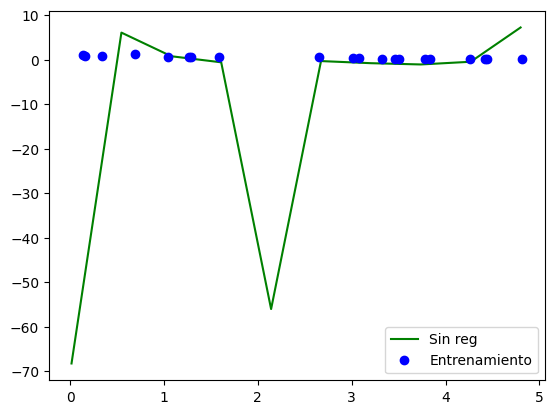

In [41]:
min_value = 0.014
max_value = 4.8
number_of_values = 10

_x, _y = an.get_prediction_interval(min_value, max_value, number_of_values)
_x_reg, _y_reg = an_reg.get_prediction_interval(min_value, max_value, number_of_values)

fig, ax = plt.subplots()

ax.plot(_x, _y, 'green')
#ax.plot(_x_reg, _y_reg)
ax.plot(x, y, 'bo')

plt.legend(labels=['Sin reg', 'Entrenamiento'])
plt.show()

In [147]:
np.linalg.cond(an.phi)

8132.7391783909225

In [148]:
np.linalg.cond(an_reg.phi)

61003.541853424715